<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 4: Practical - Convolutional Neural Networks <br>
<font color=696880 size=4>
    Arian Amani
    
    
____


### Full Name : Neda Fallah
### Student Number : 98100226
___

# Problem
This assignment uses PyTorch to build and implement a residual CNN for solving a classification problem. Our goal is to classify handwritten digits from 0 to 9 on the MNIST dataset. You can try larger and more fun datasets if you have access to Google Colab. (for example: [facial emotion detection](https://www.kaggle.com/datasets/msambare/fer2013))

* It is highly recommended to run this notebook on Google Colab so that you can utilize its GPU.
* If you need to change the inputs of functions you are implementing, or want to add new cells or functions, feel free to do so.

# Setup

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
###########################################################
##  If you need any other packages, import them below    ##
###########################################################


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Prepare The Data (10 Points)

Write a composed transformation to transform our dataset's PIL images to tensors and normalize them with ```mean: 0.1307``` and ```std: 0.3081```:

> Indented block



<details>
<summary>Hint</summary>
<br>
<a href="https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html">torchvision.transforms.Compose</a>
</details>

In [4]:
###############################################################
##                Compose your transformations               ##
###############################################################
transformation= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,), std=(0.3081,))
])

Split the downloaded MNIST dataset into two dataloaders ```train``` & ```val```

In [5]:
# Download the MNIST dataset
mnist_data = datasets.MNIST(root='data/', download=True, transform=transformation)

# Number of images in the dataset: 60,000
print(len(mnist_data))

# Split the dataset into training and validation sets
train_data, valid_data = random_split(mnist_data, [50000, 10000]) 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

60000


Create dataloaders for your train and validation data with ```batch size 16``` and ```shuffle = True``` for train loader.

<details>
<summary>Hint</summary>
<br>
<a href="https://pytorch.org/tutorials/beginner/basics/data_tutorial.html">DATASETS & DATALOADERS</a>
</details>

In [6]:
###############################################################
##           Load the datasets into train/valid              ##
##                       dataloaders                         ##
###############################################################
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(valid_data, batch_size=16, shuffle=True)

# Define Model (40 Points)

### You need to implement a model with the architecture below:
[Input: (BS, 1, 28, 28)] -- > [Conv2D (BS, 16, 28, 28)] --> ReLU --> [MaxPool2D (BS, 16, 14, 14): Residual1]

--> [Conv2D (BS, 16, 14, 14)] --> ReLU --> [Conv2D (BS, 16, 14, 14)] --> ReLU --> [Addition with Residual1]

--> [MaxPool2D (BS, 16, 7, 7)] --> [Conv2D (BS, 64, 7, 7)] --> [ReLU: Residual2]

--> [Conv2D (BS, 64, 7, 7)] --> ReLU --> [Conv2D (BS, 64, 7, 7)] --> ReLU --> [Addition with Residual2]

--> [GlobalAveragePooling (BS, 64, 1, 1)] --> [Flatten (BS, 64)] --> [Linear (BS, 10)] --> OUT

Here you can see the drawn schematic of the architecture, too: [Link](https://drive.google.com/file/d/1acQve-TOYd6wYtogpHCblhoDZt9jWQdf/view?usp=share_link)

<details>
<summary>Hint</summary>
<br>
These might be helpful:
<br>
<a href="https://pytorch.org/docs/stable/generated/torch.clone.html">TORCH.CLONE</a>
<br><br>
<a href="https://pytorch.org/docs/master/generated/torch.nn.AdaptiveAvgPool2d.html#torch.nn.AdaptiveAvgPool2d">AdaptiveAvgPool2d</a> with output size (1, 1) for global average pooling
<br><br>
<a href="https://arxiv.org/pdf/1512.03385.pdf">Deep Residual Learning for Image Recognition</a>
</details>

In [8]:
#####################################
##        Define your model        ##
##            Your Code            ##
#####################################
import torch
import torch.nn as nn
import torch.nn.functional as F


class ResidualClassifier(nn.Module):
    def __init__(self):
        super(ResidualClassifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size = 3, stride=1, padding = 1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 16, 3, 1, 1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(16, 16, 3, 1, 1)
        self.relu3 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4 = nn.Conv2d(16, 64, 3, 1, 1)
        self.relu4 = nn.ReLU()
        self.conv5 = nn.Conv2d(64, 64, 3, 1, 1)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(64, 64, 3, 1, 1)
        self.relu6 = nn.ReLU()
        self.pool3 = nn.AdaptiveAvgPool2d((1,1))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(64, 10)
        
    def forward(self, x):
        seq1_out = self.conv1(x)
        seq1_out = self.relu1(seq1_out)
        seq1_out = self.pool1(seq1_out)
        
        seq2_out = self.conv2(seq1_out)
        seq2_out = self.relu2(seq2_out)
        seq2_out = self.conv3(seq2_out)
        seq2_out = self.relu3(seq2_out)
        seq2_out = seq2_out + seq1_out
        
        seq3_out = self.pool2(seq2_out)
        seq3_out = self.conv4(seq3_out)
        seq3_out = self.relu4(seq3_out)
        
        seq4_out = self.conv5(seq3_out)
        seq4_out = self.relu5(seq4_out)
        seq4_out = self.conv6(seq4_out)
        seq4_out = self.relu6(seq4_out)
        seq4_out = seq4_out + seq3_out
        
        seq_out = self.pool3(seq4_out)
        seq_out = self.flatten(seq_out)
        seq_out = self.fc(seq_out)
        return seq_out


'\nclass ResidualClassifier(nn.Module):\n    def __init__(self):\n        super(ResidualClassifier, self).__init__()\n        \n        # First Conv2D layer\n        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)\n        \n        # Second Conv2D layer with ReLU activation\n        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)\n        self.relu2 = nn.ReLU()\n        \n        # Third Conv2D layer with ReLU activation\n        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)\n        self.relu3 = nn.ReLU()\n        \n        # First MaxPool layer\n        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)\n        \n        # Fourth Conv2D layer\n        self.conv4 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, padding=1)\n        \n        # Fifth Conv2D layer with ReLU activation\n        self.conv5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

# Train Model (30 Points)

In [9]:
######################################################################
##        Instantiate model, define hyper parameters, optimizer,    ##
##        loss function and etc                                     ##
######################################################################
#hyperparameters
num_classes = 10
learning_rate = 0.01
total_step = len(train_loader)
num_epochs = 20
total_step = len(train_loader)


#instantiate
model = ResidualClassifier().to(device)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.001, momentum = 0.9)

In [11]:
#import gc

######################################################################
##        Train your model (Complete the code below)                ##
######################################################################
total_step = len(train_loader)
num_epochs = 20
loss_values = []
val_accuracies = []  
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:  
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    loss_values.append(avg_loss)

    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, avg_loss))
    
    correct = 0
    total = 0  
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        val_acc = 100 * correct / total
        print('Accuracy of the network on the {} validation images: {:.2f} %'.format(5000, val_acc)) 
        val_accuracies.append(val_acc)




Epoch [1/20], Loss: 0.4387
Accuracy of the network on the 5000 validation images: 96.17 %
Epoch [2/20], Loss: 0.1051
Accuracy of the network on the 5000 validation images: 96.55 %
Epoch [3/20], Loss: 0.0768
Accuracy of the network on the 5000 validation images: 97.68 %
Epoch [4/20], Loss: 0.0674
Accuracy of the network on the 5000 validation images: 98.24 %
Epoch [5/20], Loss: 0.0611
Accuracy of the network on the 5000 validation images: 96.91 %
Epoch [6/20], Loss: 0.0572
Accuracy of the network on the 5000 validation images: 98.20 %
Epoch [7/20], Loss: 0.0542
Accuracy of the network on the 5000 validation images: 98.18 %
Epoch [8/20], Loss: 0.0530
Accuracy of the network on the 5000 validation images: 98.12 %
Epoch [9/20], Loss: 0.0510
Accuracy of the network on the 5000 validation images: 97.90 %
Epoch [10/20], Loss: 0.0478
Accuracy of the network on the 5000 validation images: 97.33 %
Epoch [11/20], Loss: 0.0502
Accuracy of the network on the 5000 validation images: 98.21 %
Epoch [1

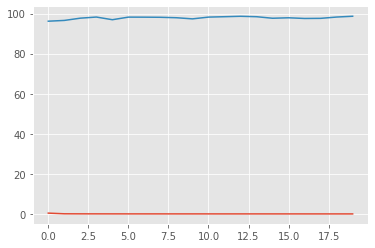

In [13]:
##############################################################
##          Plot metrics graph for different epochs         ##
##                        Your Code                         ##
##############################################################


# Plot loss
plt.plot(loss_values)

# Plot accuracy
plt.plot(val_accuracies)



# Test Model (20 Points)

In [59]:
##################################################
##          Test your model on test-set         ##
##          and plot confusion matrix           ##
##################################################

test_data = datasets.MNIST(root='data/', download=True, transform=transformation, train=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
print(len(test_data))
y_true = []
y_pred = []

running_accuracy = 0 
total = 0 
 


 
with torch.no_grad(): 
#loss_values = []
#val_accuracies = []  
#running_loss = 0.0
 for images, labels in test_loader:  
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        labels = labels.type_as(outputs)
        total += outputs.size(0)  
        _, predicted = torch.max(outputs.data, 1)
        running_accuracy += torch.sum(torch.tensor(predicted == labels, dtype=torch.float)).item()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

      

 print('Accuracy of the model based on the test set is:')
 print(100 * running_accuracy / total)           



10000


<ipython-input-59-e42c1b72769f>:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  running_accuracy += torch.sum(torch.tensor(predicted == labels, dtype=torch.float)).item()


Accuracy of the model based on the test set is:
98.99


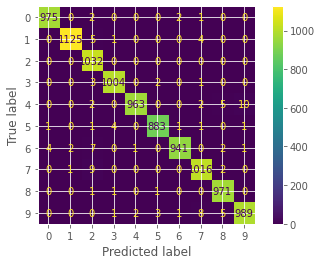

In [60]:
#cf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()